**Цель исследования**

Цель данного проекта состоит в том, чтобы выявить причины убытков, которые компания терпит, несмотря на значительные вложения в рекламу приложения Procrastinate Pro+, и понять, что нужно сделать для того, чтобы компания вновь начала получать прибыль. 


**Описание данных**

Данные представлены 3-мя датасетами:

* visits_info_short.csv
* orders_info_short.csv
* costs_info_short.csv

Структура visits_info_short.csv:
* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.

Структура orders_info_short.csv:
* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.

Структура costs_info_short.csv:
* dt — дата проведения рекламной кампании,
* Channel — идентификатор рекламного источника,
* costs — расходы на эту кампанию.


**План исследования**

1. Загрузка и подготовка данных.

Загрузим данные, изучим общую информацию о датафрейме и проведем предобработку. 

2. Подготовка функций для расчетов.

Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии

3. Исследовательский анализ данных.

Составим профили пользователей. Изучим, как пользователи распределены по странам, устройствам и каналам привлечения.  

4. Маркетинг

Посчитаем общую сумму расходов на маркетинг и их распределение по каналам привлечения. Рассчитаем CAC для каждого канала.

5. Оценка окупаемость рекламы

Рассмотрим окупаемость рекламы в целом. Рассмотрим конверсию, удержание, LTV и ROI в разбивке по устройствам, странам и каналам привлечения. 

6. Выводы.

Напишем общие выводы по итогам исследования.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`;
- заказы: `/datasets/orders_info_short.csv`;
- расходы: `/datasets/costs_info_short.csv`.

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

#### Загрузим и изучим данные

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')

In [3]:
orders = pd.read_csv('/datasets/orders_info_short.csv')

In [4]:
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [5]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [9]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Пропуски в данных отсутствуют, однако есть другие проблемы: во-первых требуется скорректировать названия столбцов во всех 3-х датафреймах - заменить заглавные буквы на прописные, пробелы на нижние подчеркивания; во-вторых в столбцах с датами необходимо поменять тип данных.

#### Проведем предобработку

Поправим названия столбцов

In [11]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [12]:
orders.columns = ['user_id', 'event_dt', 'revenue']

In [13]:
costs.columns = ['dt', 'channel', 'costs']

Скорректируем тип данных в столбцах

In [14]:
visits['session_start'] = pd.to_datetime(visits['session_start'])

In [15]:
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [16]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [17]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Проверим данные на наличие явных дубликатов

In [18]:
visits.duplicated().sum()

0

In [19]:
orders.duplicated().sum()

0

In [20]:
costs.duplicated().sum()

0

Проверим данные на наличие неявных дубликатов

In [21]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [22]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [23]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [24]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Дубликатов не обнаружено

In [25]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [26]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [27]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Названия столбцов исправлены, типы данных скорректированы - предобработка завершена.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Зададим функцию для создания профилей пользователей - get_profiles()

In [28]:
def get_profiles(sessions, orders, ad_costs):
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Зададим функцию для подсчёта Retention Rate - get_retention()

In [29]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Зададим функцию для подсчёта конверсии - get_conversion()

In [30]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Зададим функцию для подсчёта LTV - get_ltv()

In [31]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Зададим функцию для сглаживания данных - filter_data()

In [32]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Зададим функцию для построения графика Retention Rate - plot_retention()

In [33]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### Зададим функцию для построения графика конверсии - plot_conversion()

In [34]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Зададим функцию для визуализации LTV и ROI - plot_ltv_roi()

In [35]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составим профили пользователей.

Воспользуемся функцией get_profiles().

In [36]:
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


Определим минимальную и максимальную даты привлечения пользователей.

In [37]:
min_date = profiles['dt'].min()
min_date

datetime.date(2019, 5, 1)

In [38]:
max_date = profiles['dt'].max()
max_date

datetime.date(2019, 10, 27)

Минимальная дата - 5 мая 2019, максимальная - 27 октября 2019. Все в соответствии с описанием к нашим данным.

#### Рассмотрим из каких стран в приложение приходит больше всего пользователей, и какую долю среди них занимают платящие пользователи.

In [39]:
profiles.groupby('region').agg({'user_id': 'count', 'payer': 'mean'}).sort_values(by='payer', ascending=False) 

,user_id,payer
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


Больше всего пользователей из США - 100002, это 2/3 от всех пользователей, по остальным странам пользователи распределены достаточно равномерно. В США же наиболее высокий процент платящих пользователей - 6.9%, в остальных странах - 3.8-4.1%.

#### Теперь сравним данные о пользователях на основе используемых устройств.

In [40]:
profiles.groupby('device').agg({'user_id': 'count', 'payer': 'mean'}).sort_values(by='payer', ascending=False)  

,user_id,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


Больше всего пользователей пользуется iPhone - 54479, на остальных устройствах примерно поровну - 30-35 тысяч пользователей. При этом доля платящих пользователей несколько выше у Mac - 6.36% против 6.2% у iPhone, 5.85% у Android, в аутсайдерах PC с 5%.

#### Перейдем к распределению по каналам привлечения пользователей.

In [41]:
profiles.groupby('channel').agg({'user_id': 'count', 'payer': 'mean'}).sort_values(by='payer', ascending=False)  

,user_id,payer
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


Больше всего пользователей пришло по органическому каналу - 56439, однако среди них меньше всего доля платящих пользователей - 2%. На втором месте по количеству привлеченных пользователей канал FaceBoom - 29144, он же первый по соотношению платящих пользователей - 12.2%. Третье место - TipTop - 19561 привлеченный пользователь, при этом доля платящих пользователей только 9.6% - меньше чем у AdNonSense и lambdaMediaAds - 11.3% и 10.5% соответственно. Меньше всего пользователей привлек канал lambdaMediaAds - 2149, остальные каналы - от 4 до 8,5 тысяч пользователей.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Посчитаем общую сумму расходов на маркетинг.

In [42]:
ad_total = costs['costs'].sum()
ad_total

105497.30000000002

#### Рассмотрим распределение трат по источникам.

In [43]:
costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)  

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


На первом месте по затратам - TipTop, при этом как мы помним по количеству привлеченных пользователей он только на 3-м месте, а по доле платящих пользователей - на 4-м. FaceBoom при меньших затратах привлек больше пользователей, с большей долей платящих.

#### Рассмотрим распределение затрат на рекламу по неделям и месяцам.

<AxesSubplot:title={'center':'Затраты на рекламу по неделям'}, xlabel='Недели', ylabel='Затраты'>

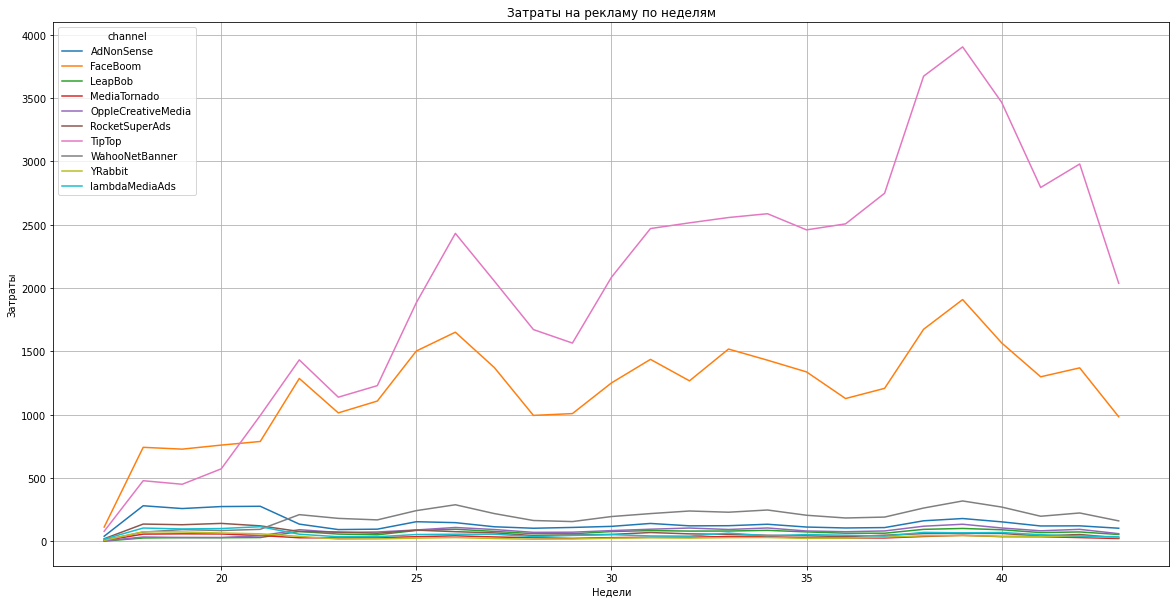

In [44]:
costs['week'] = costs['dt'].astype('datetime64[W]').dt.isocalendar().week
costs.pivot_table(index='week', columns=['channel'], values='costs', aggfunc='sum').plot(
    grid=True, title='Затраты на рекламу по неделям', xlabel='Недели', ylabel='Затраты', figsize=(20, 10))

<AxesSubplot:title={'center':'Затраты на рекламу по месяцам'}, xlabel='Месяцы', ylabel='Затраты'>

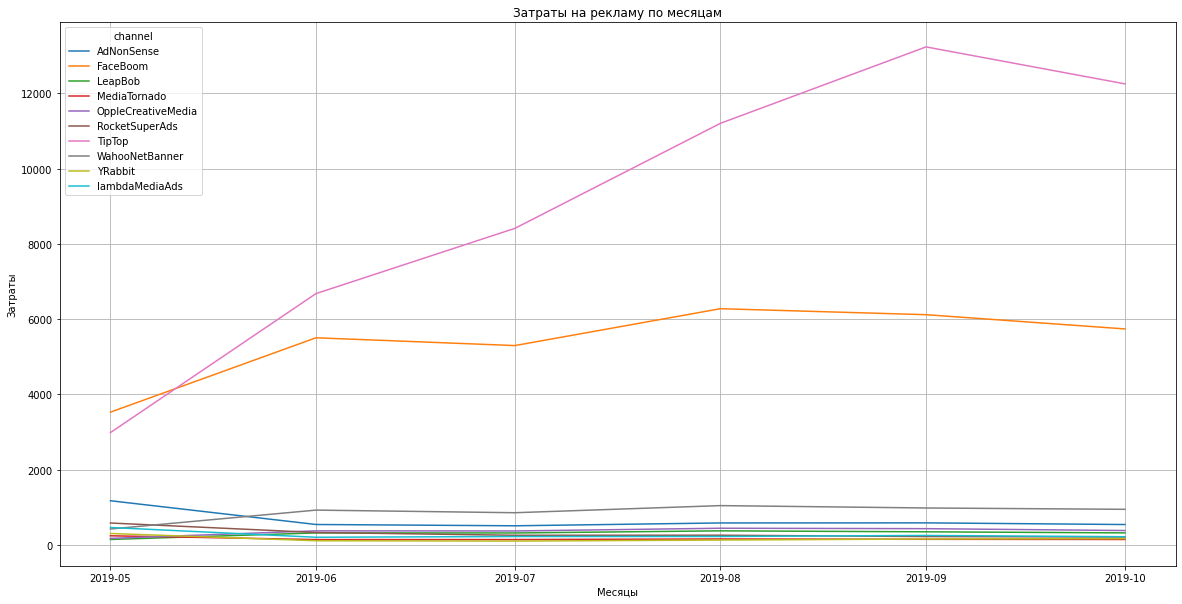

In [45]:
costs['month'] = costs['dt'].astype('datetime64[M]').dt.date
costs.pivot_table(index='month', columns=['channel'], values='costs', aggfunc='sum').plot(
    grid=True, title='Затраты на рекламу по месяцам', xlabel='Месяцы', ylabel='Затраты', figsize=(20, 10))

Рекламные затраты на TipTop значительно растут почти на всем исследуемом периоде и начинают падать только после 39 недели - в октябре. Затраты на FaceBoom заметно растут до июня, после чего колеблются на одном уровне. Затраты на lambdaMediaAds несколько растут до июня, затем падают и остаются до конца периода практически без изменений. WahooNetBanner напротив с начала июня испытывает небольшой рост и остается на повышенном уровне до конца исследуемого периода. Остальные источникт остаются на одном уровне на протяжении всего периода.

#### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [46]:
profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Сразу выделяется TipTop - CAC - 2.8, это в два с половиной раза больше чем у следующего за ним FaceBoom (1.1). Сопоставимый с FaceBoom CAC у AdNonSense - 1.0. У остальных каналов CAC меньше единицы и у завершающей тройки - YRabbit, MediaTornado и LeapBob составляет 0.21-0.22.	

#### Выводы по этапу: 

Обращают на себя внимание каналы TipTop и FaceBoom - расходы на эти каналы заметно превышают затраты на все остальные каналы вместе взятые. При этом CAC TipTop - 2.8, что заставляет сомневаться в рентабельности расходов на канал. Для окончательных выводов требуется провести дополнительные исследования, однако можно предположить, что затраты на каналы TipTop и FaceBoom являются одной из причин падения доходов.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

В соответствии с бизнес-планом установим горизонт анализа в 14 дней.

In [47]:
horizon_days = 14

Установим датой исследования 1 ноября 2019 года.

In [48]:
observation_date = datetime(2019, 11, 1).date()

Уберем данные по органическим пользователям - нас интересует окупаемость платных каналов привлечения.

In [49]:
profiles = profiles.query('channel != "organic"')

#### Рассмотрим окупаемость рекламы в целом. 

Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi().

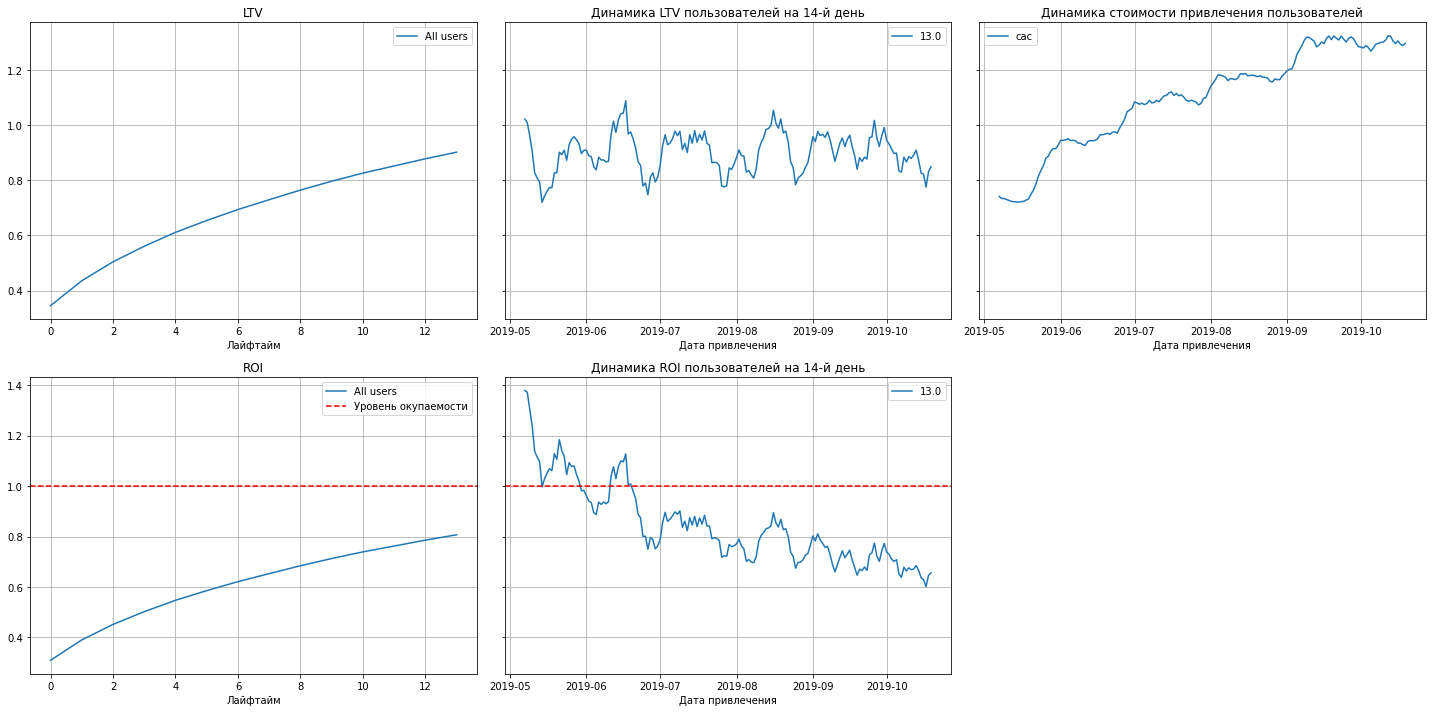

In [50]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Сразу можно отметить, что реклама не окупается - на 14-й день ROI достигает только 0.8, не переходя порог окупаемости в единицу. LTV пользователей на 14-й день испытывает определенные сезонные колебания, но в целом остается в промежутке между 0.8 и 1.0. А вот ROI 14-го дня со временем падает - это происходит а фоне постоянного роста стоимости привлечения пользователей.

#### Рассмотрим конверсию и удержание пользователей по устройствам.

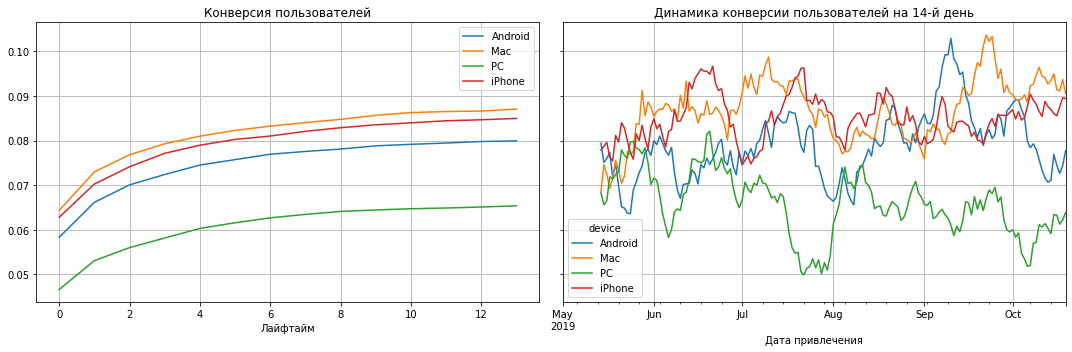

In [51]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions
)
plot_conversion(conversion_grouped, conversion_in_time, horizon_days, 14)

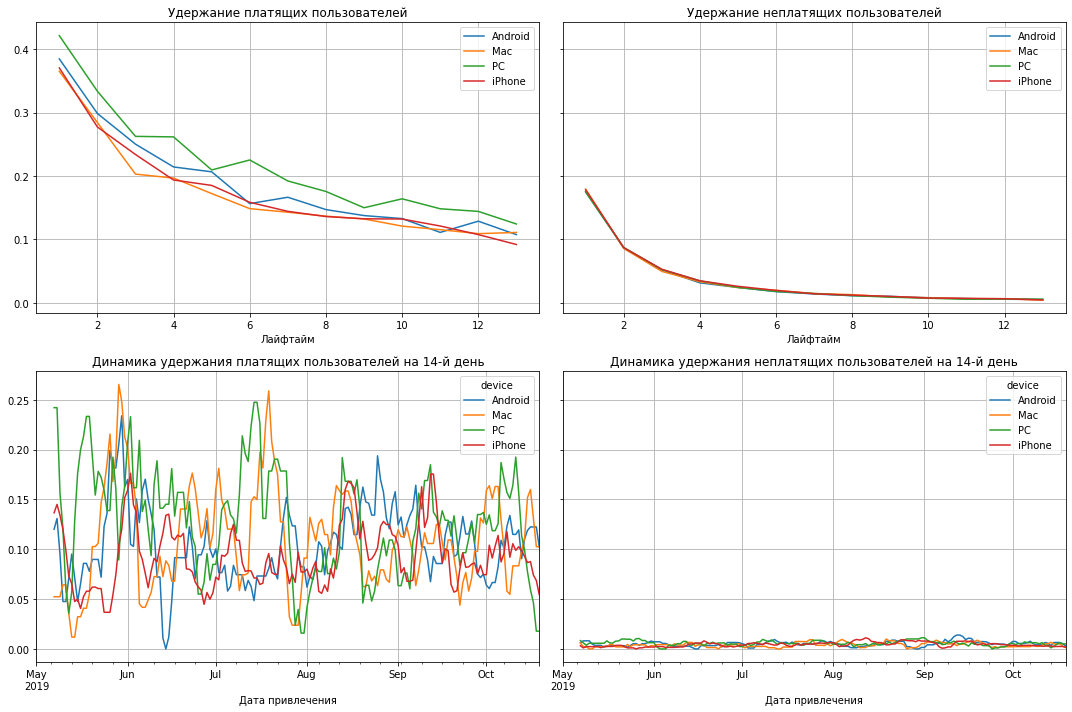

In [52]:
dimensions = ['device']
retention_raw, retention_grouped, retention_in_time = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention_grouped, retention_in_time, horizon_days)

Mac и iPhone демонстрируют наилучшую конверсию пользователей, но при этом имеют худшее удержание. Напротив PC, имея худшие показатели конверсии, демонстрирует наилучшее удержание. 

#### Рассмотрим конверсию и удержание пользователей по странам.

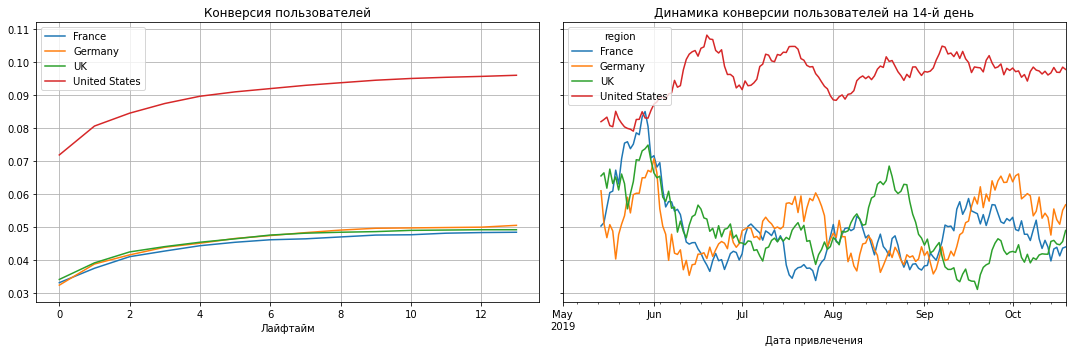

In [53]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions
)
plot_conversion(conversion_grouped, conversion_in_time, horizon_days, 14)

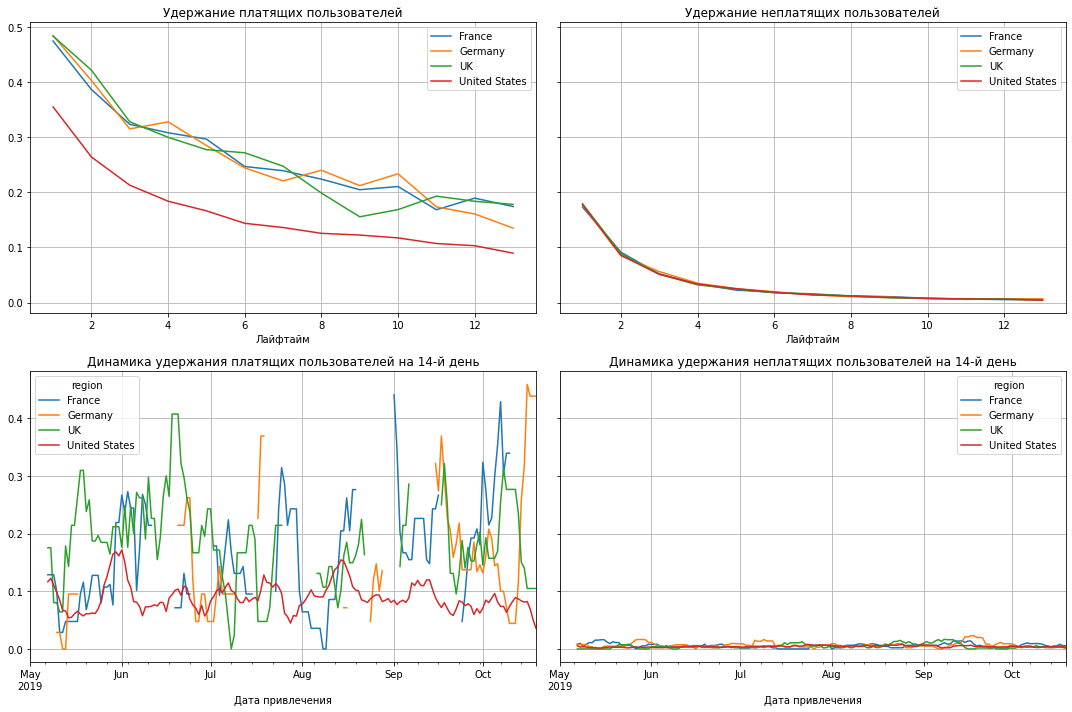

In [54]:
dimensions = ['region']
retention_raw, retention_grouped, retention_in_time = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention_grouped, retention_in_time, horizon_days)

Конверсия пользователей в США заметно выше, чем в остальных странах, но при этом в США хуже всего удержание пользователей.

#### Рассмотрим конверсию и удержание пользователей по каналам.

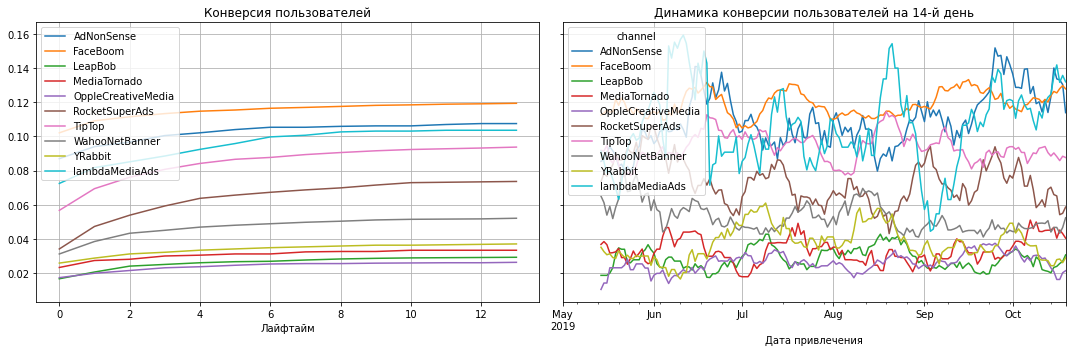

In [55]:
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions
)
plot_conversion(conversion_grouped, conversion_in_time, horizon_days, 14)

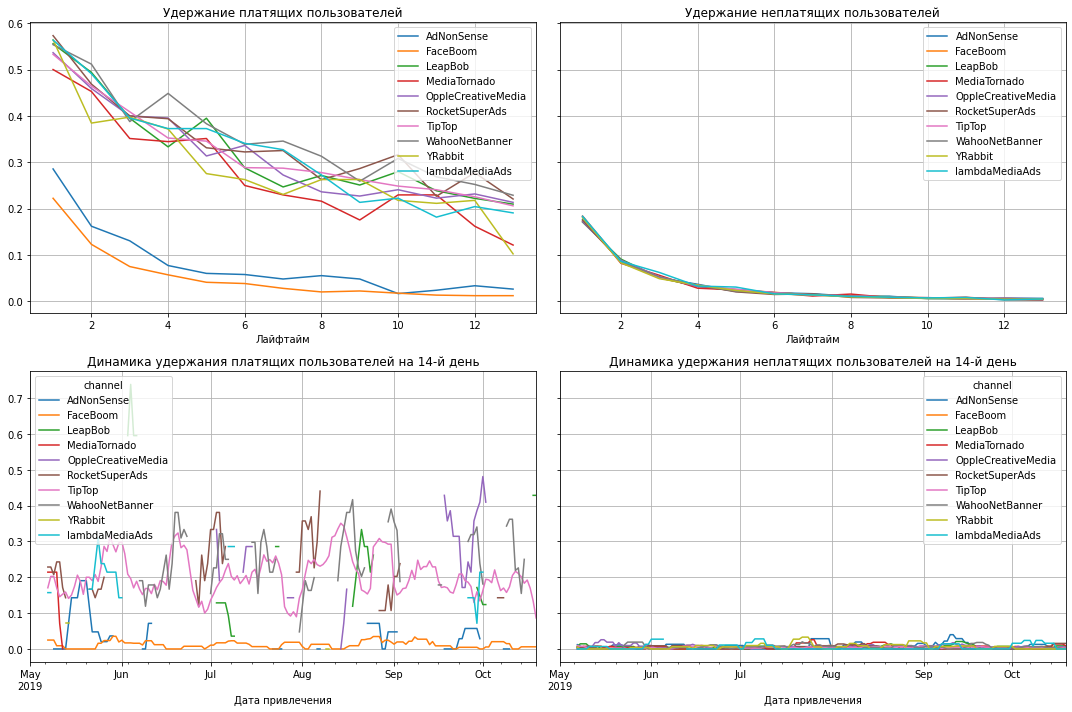

In [56]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_in_time = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention_grouped, retention_in_time, horizon_days)

Выше всего конверсия у канала FaceBoom, но он же показывает худшее удержание. На втором месте по конверсии канал AdNonSense, его удержание однако лишь чуть выше, чем у FaceBoom. Чуть хуже конверсия у lambdaMediaAds, при этом удержанеи у этого канала находится на среднем уровне. Худшая конверсия при среднем удержании у канала OppleCreativeMedia.

#### Теперь рассмотрим LTV и ROI с разбивкой по устройствам.

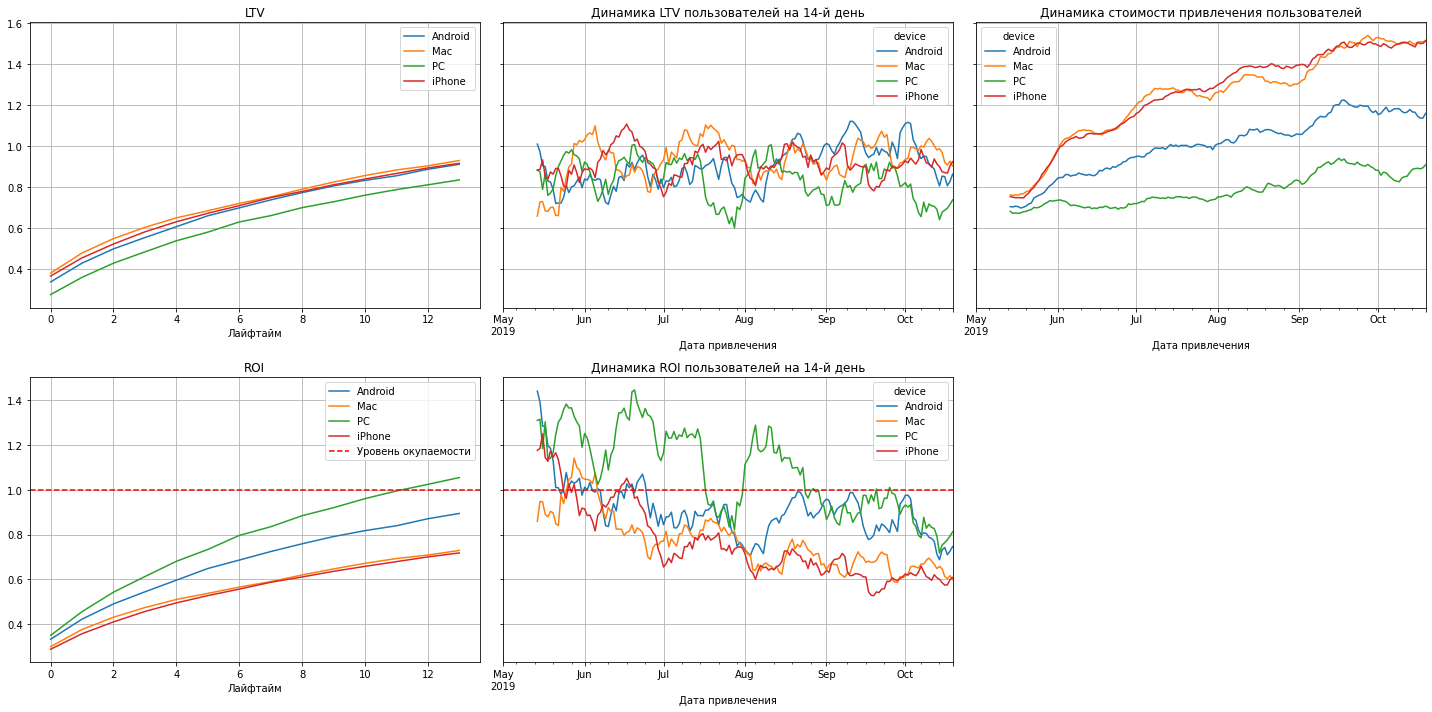

In [57]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, 14)

На уровень окупаемости вышел только PC, при этом его LTV несколько ниже среднего, но это компенсируется самым низким CAC.   

#### Рассмотрим LTV и ROI с разбивкой по странам.

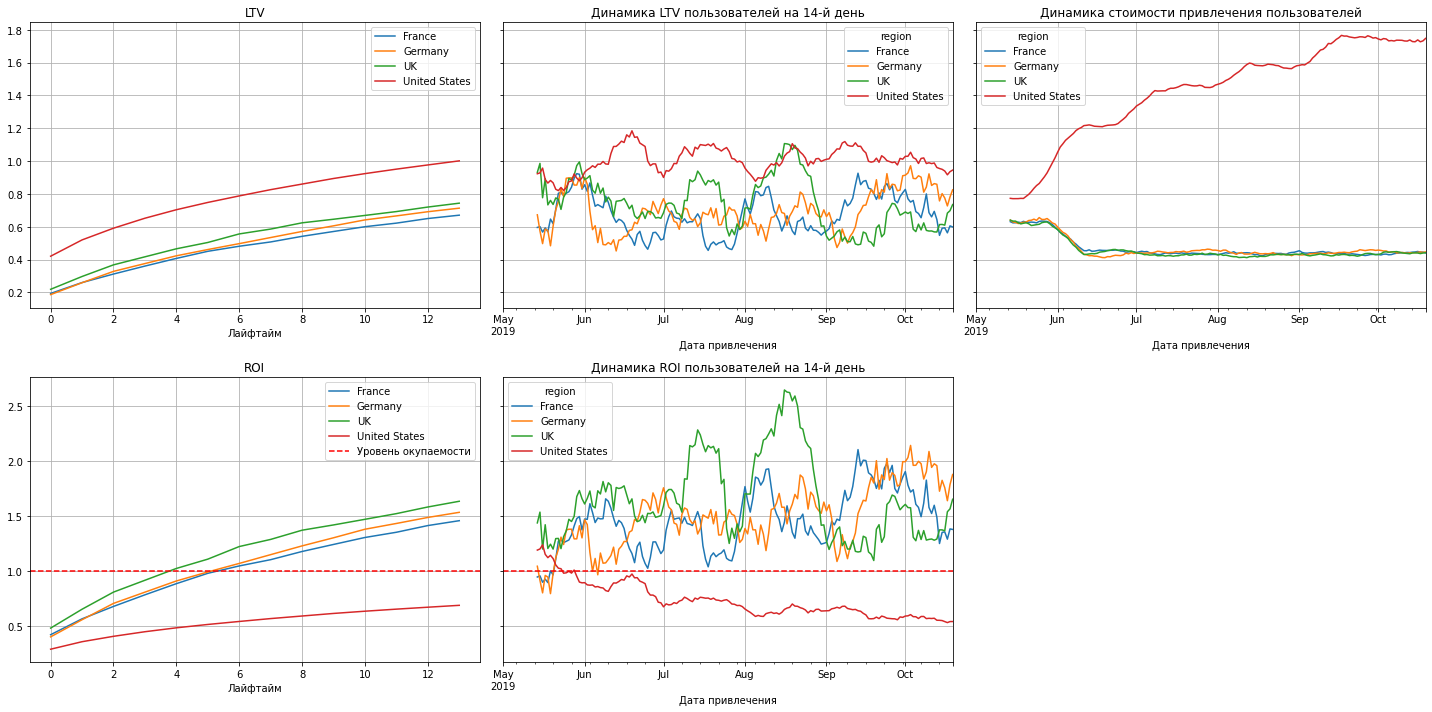

In [58]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, 14)

Имея самый высокий LTV, США - единственная страна не вышедшая на уровень окупаемости. При этом CAC США значительно рос на протяжении всего периода исследования, тогда как CAC других несколько снизился. Учитывая, что 2/3 всех пользователей приходится на США, можно предположить, что проблемы с рентабельностью рекламы связаны именно с США.

#### Перейдем к разбивке LTV и ROI по каналам привлечения пользователей.

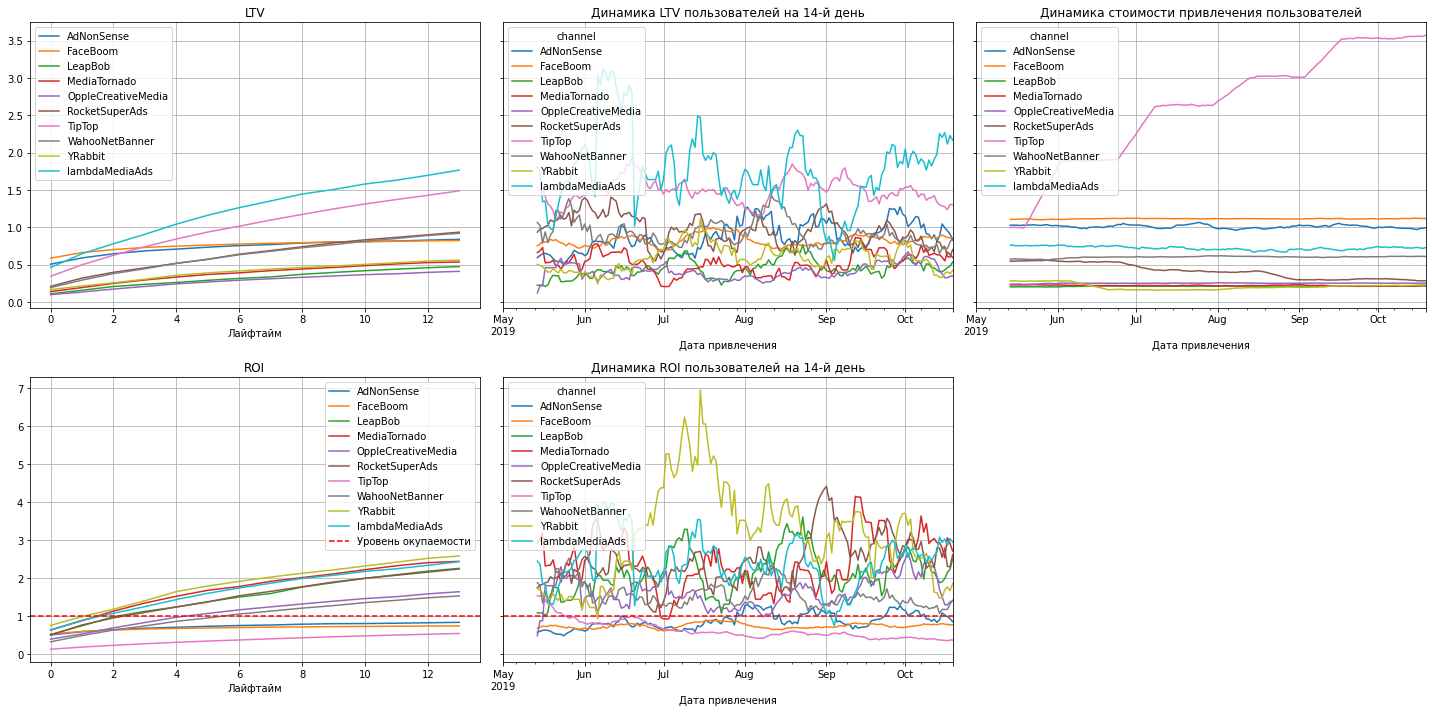

In [59]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, 14)

Каналы TipTop, FaceBoom и AdNonSense не вышли на уровень окупаемости. Наилучший ROI показал канал YRabbit. При том, что CAC канала TipTop рос весь период исследования, его LTV меньше, чем у lambdaMediaAds, затраты на который заметно меньше - 54751.30 и 1557.6 соответственно.

Рассмотрим также как LTV и ROI каналов отличается по странам, это пригодится нам при составлении рекомендаций для отдела маркетинга.

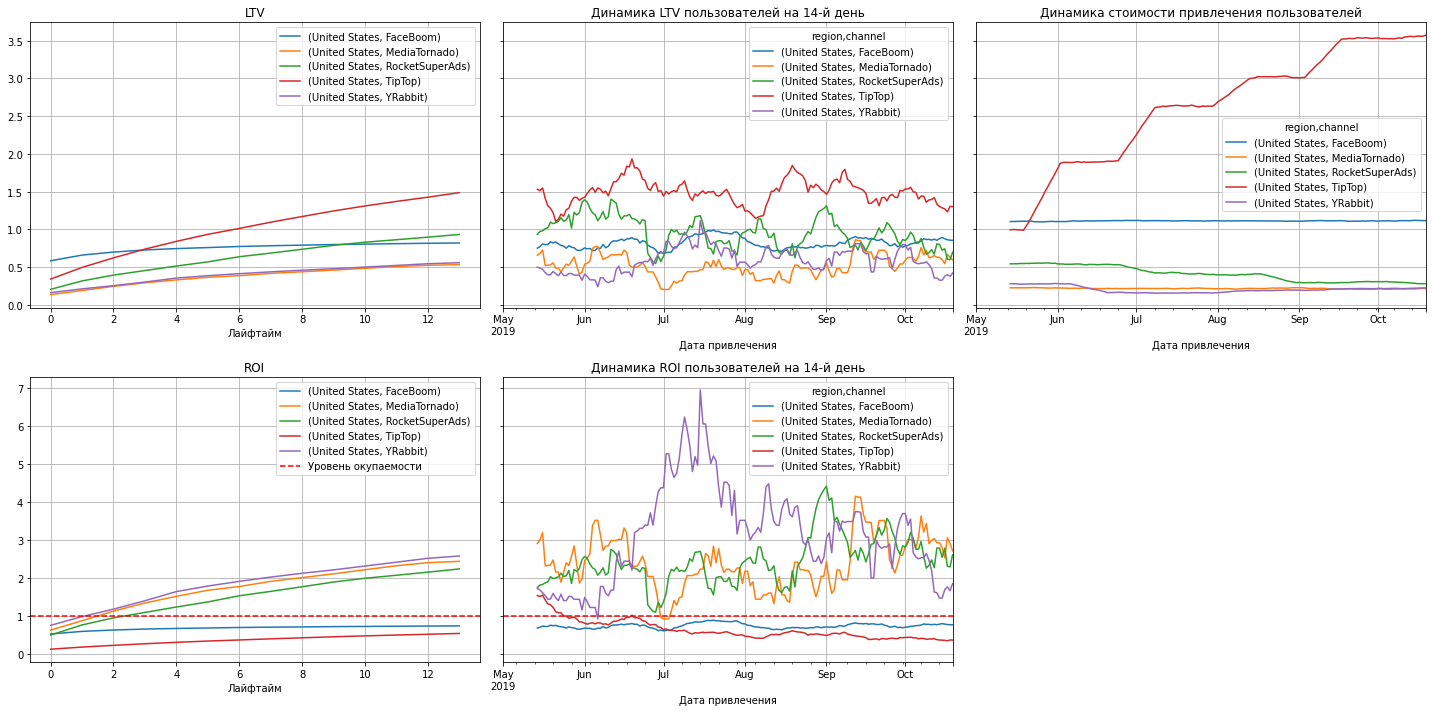

In [60]:
dimensions = ['region', 'channel']
profiles_reg = profiles[profiles['region'] == 'United States']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_reg, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, 14)

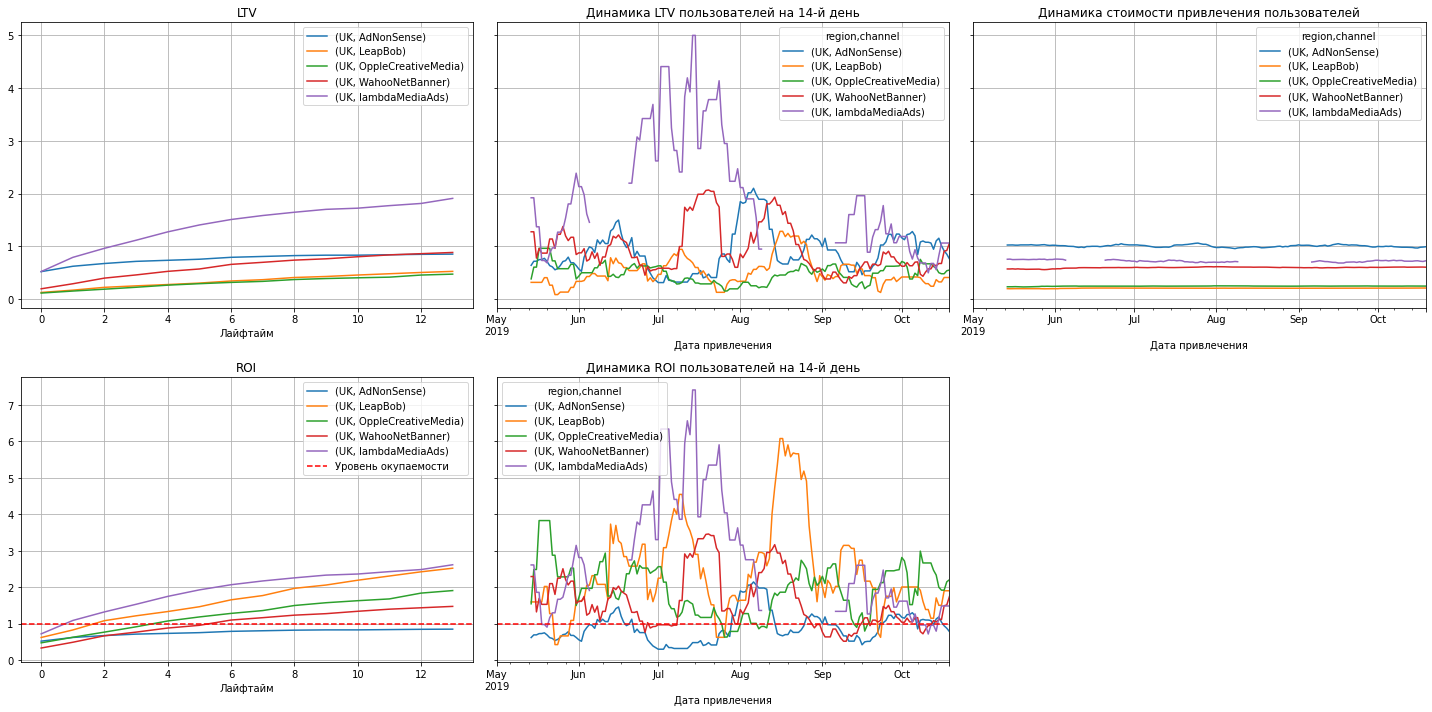

In [61]:
dimensions = ['region', 'channel']
profiles_reg = profiles[profiles['region'] == 'UK']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_reg, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, 14)

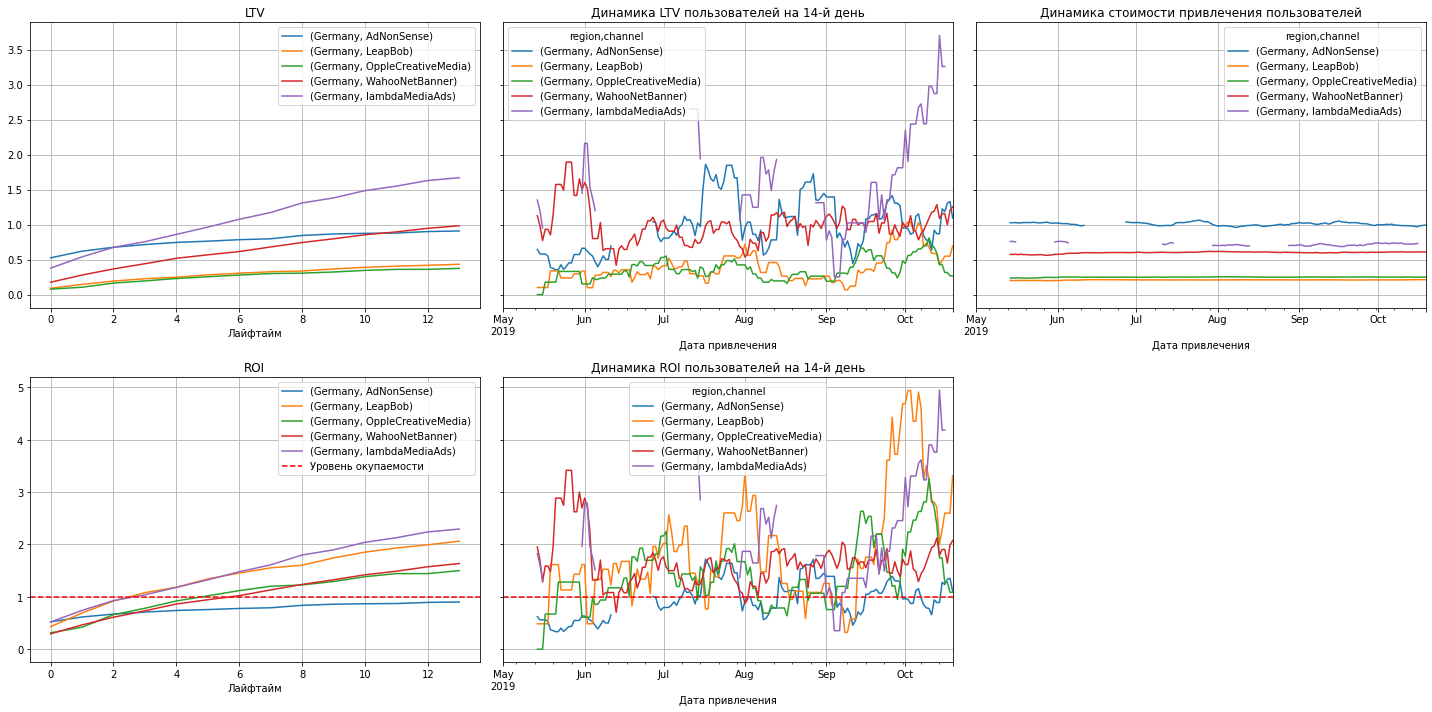

In [62]:
dimensions = ['region', 'channel']
profiles_reg = profiles[profiles['region'] == 'Germany']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_reg, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, 14)

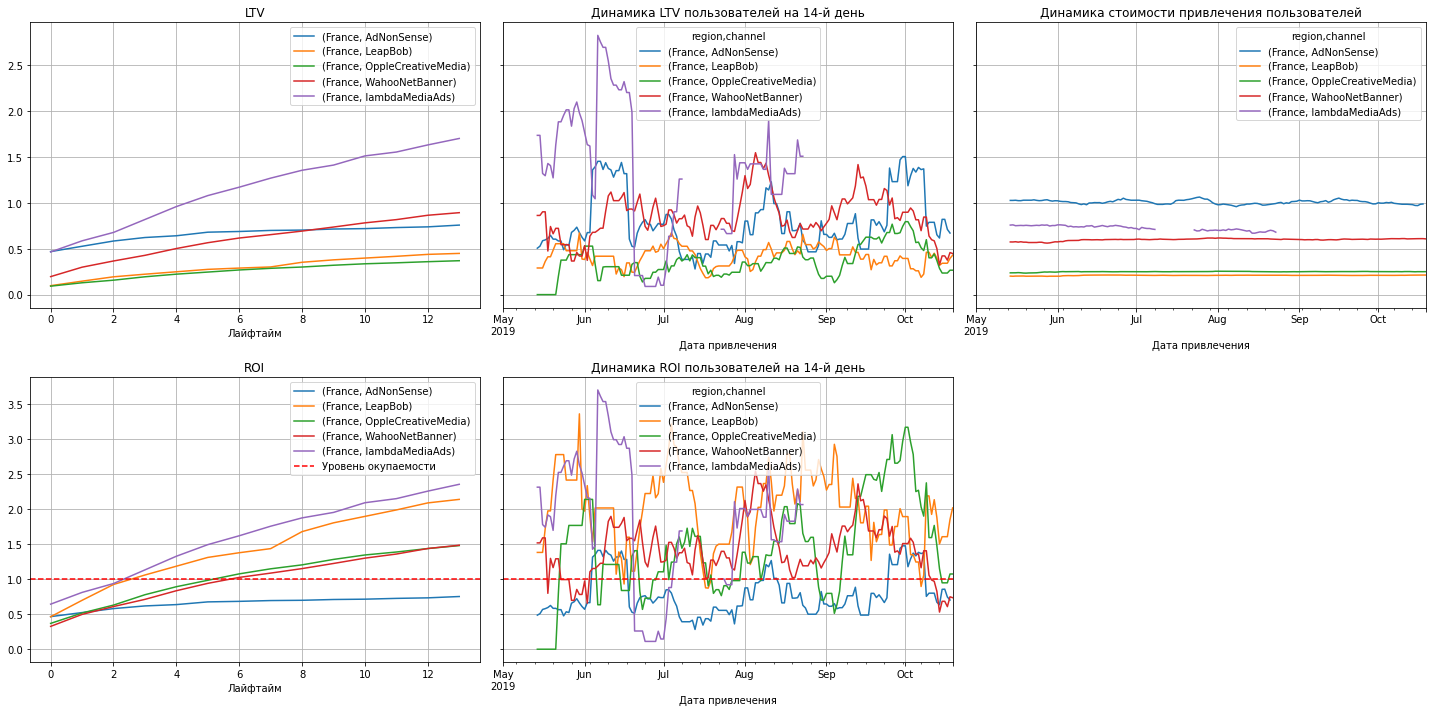

In [63]:
dimensions = ['region', 'channel']
profiles_reg = profiles[profiles['region'] == 'France']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_reg, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, 14)

Если для США проблемными являются TipTop и FaceBoom, то для Европы это AdNonSense. При этом в США хорошо себя показал канал RocketSuperAds - при ROI выше уровня окупаемости он также продемонстрировал неплохую конверсию и высокое удержание. В Европе фаворит - канал lambdaMediaAds, самый высокий среди европейских каналов ROI при высокой конверсии - тут он уступает лишь FaceBoom и AdNonSense и хорошее удержание.

#### Выводы по этапу: 
* в целом реклама не окупается; 
* на окупаемости рекламы негативно сказываются каналы TipTop и FaceBoom, расходы на эти каналы явно не соответствуют отдаче; 
* в региональном плане хуже всего ситуация с пользователями из США - при хорошей конверсии они демонстрируют низкое удержание и не выходят на уровень окупаемости; 
* в плане устройств хуже всего ситуация с продуктами Apple - Mac и iPhone, однако это может быть связано с распространенностью этих устройств в США, а не с устройствами как таковыми. 

Пользователи из США плохо удерживаются - возможно стоит задуматься о каких-либо бонусах, которые позволят удержать клиентов из США, также имеет смысл обратить больше внимания на пользователей и из других стран - на данный момент они стабильно окупаются. Чрезмерные затраты на каналы TipTop и FaceBoom себя не оправдывают - имеет смысл уделить больше внимания другим каналам. Хотя низкая окупаемость на Mac и iPhone связана вероятней всего с регионом, а не самими устройствами, стоит проверить нет ли технических проблем на данных устройствах.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Выводы:**

1. Расходы на рекламу не окупаются 
2. В региональном плане 2/3 пользователей составляют жители США - они показывают хорошую конверсию, но низкое удержание и не выходят на уровень окупаемости. При этом пользователи из Европы - Германии, Великобритании и Франции, имея более низкую конверсию, показывают лучшее удержание. В отличие от пользователей из США они выходят на уровень окупаемости на 4-6 день. Имеет смысл уделить большее внимание пользователям из Европы. Касательно США стоит изучить причины низкого удержания и понять, как его повысить.
3. По устройствам хуже всего показывают себя Mac и iPhone, однако вероятнее всего причина не в самих устройствах, а в том, что именно эти устройства популярнее всего среди пользователей из США. Тем не менее, стоит проверить нет ли технических проблем на данных устройствах. На общем фоне хорошо показал себя ПК - он единственный смог выйти на уровень окупаемости на 14-й день (хотя с сентября проседает и он). Устройства на Android оказались посередине - демонстрируя лучший чем продукция Apple ROI, Android однако так и не смог преодолеть порог окупаемости.
4. Можно выделить три проблемных канала: TipTop и FaceBoom в США и AdNonSense в Европе. Все три не выходят на уровень окупаемости. FaceBoom и AdNonSense имеют хорошую конверсию - здесь они на 1-м и 2-м местах среди всех каналов, но одновременно с этим самое низкое удержание среди всех каналов. Канал TipTop имеет хорошую конверсию, его удержание также находится на приемлемом уровне, однако рост расходов на этот канал в течение всего исследуемого периода привел к значительному росту CAC канала. В итоге ROI канала TipTop не поднимался выше уровня окупаемости практически на всем периоле исседования - инвестиции в канал TipTop себя не оправдали. Чтобы исправить ситуацию в США имеет смысл обратить больше внимания каналу RocketSuperAds, при ROI выше уровня окупаемости он также продемонстрировал неплохую конверсию и высокое удержание. В Европе дополнительных инвестиций заслуживает канал lambdaMediaAds - самый высокий среди европейских каналов ROI при высокой конверсии и хорошем удержании.

